In [1]:
import pandas as pd
data=pd.read_csv("~/winequality-red.csv")

In [2]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [5]:
X = data.drop('quality', axis=1)
y = data['quality']

In [11]:
seed=8
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM_rbf', SVC()))
models.append(('SVM_linear', SVC(kernel='linear')))

In [12]:
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, X_train, y_train, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test, clf.predict(X_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

LR: 0.567871 (0.029642) 0.628125
RF: 0.639888 (0.034187) 0.681250
DT: 0.579672 (0.046310) 0.665625
SVM_rbf: 0.551437 (0.036942) 0.618750
SVM_linear: 0.564584 (0.025517) 0.637500


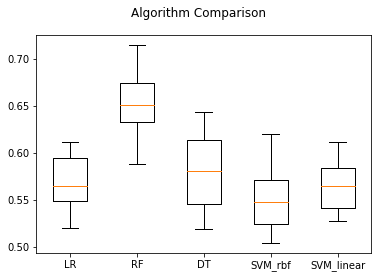

In [9]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

In [13]:
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)